In [1]:
from data_loaders import load_and_merge
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from forecast_helpers import ForecastConfig, forecast_by_category, plot_total_panel, plot_category_panels, make_summary_table, setup_plot_style, plot_total_panel_possion_regression
merged_df = load_and_merge()

In [2]:
%matplotlib inline
plot_dims = setup_plot_style()

## Risk Domain

years_hist: [2019 2020 2021 2022 2023 2024]
y_total: [ 43.  84.  75.  98. 149. 215.]
w_year: [  2.718   7.389  20.086  54.598 148.413 403.429]
share weight quantiles: [0.04839867 0.04839867 0.12805084 0.33879068 3.43048038 8.59551742]


/Users/user/Documents/AI/AI Incidents Forecasting/ai-incident-forecasting/src/forecast_helpers.py:304: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d.groupby(["__year", "__cat"])["__val"]
/Users/user/Documents/AI/AI Incidents Forecasting/ai-incident-forecasting/src/forecast_helpers.py:313: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d.groupby([pd.Grouper(key=date_col, freq="MS"), "__cat"])["__val"]
/opt/miniconda3/envs/ai_incident_forecasting/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then 

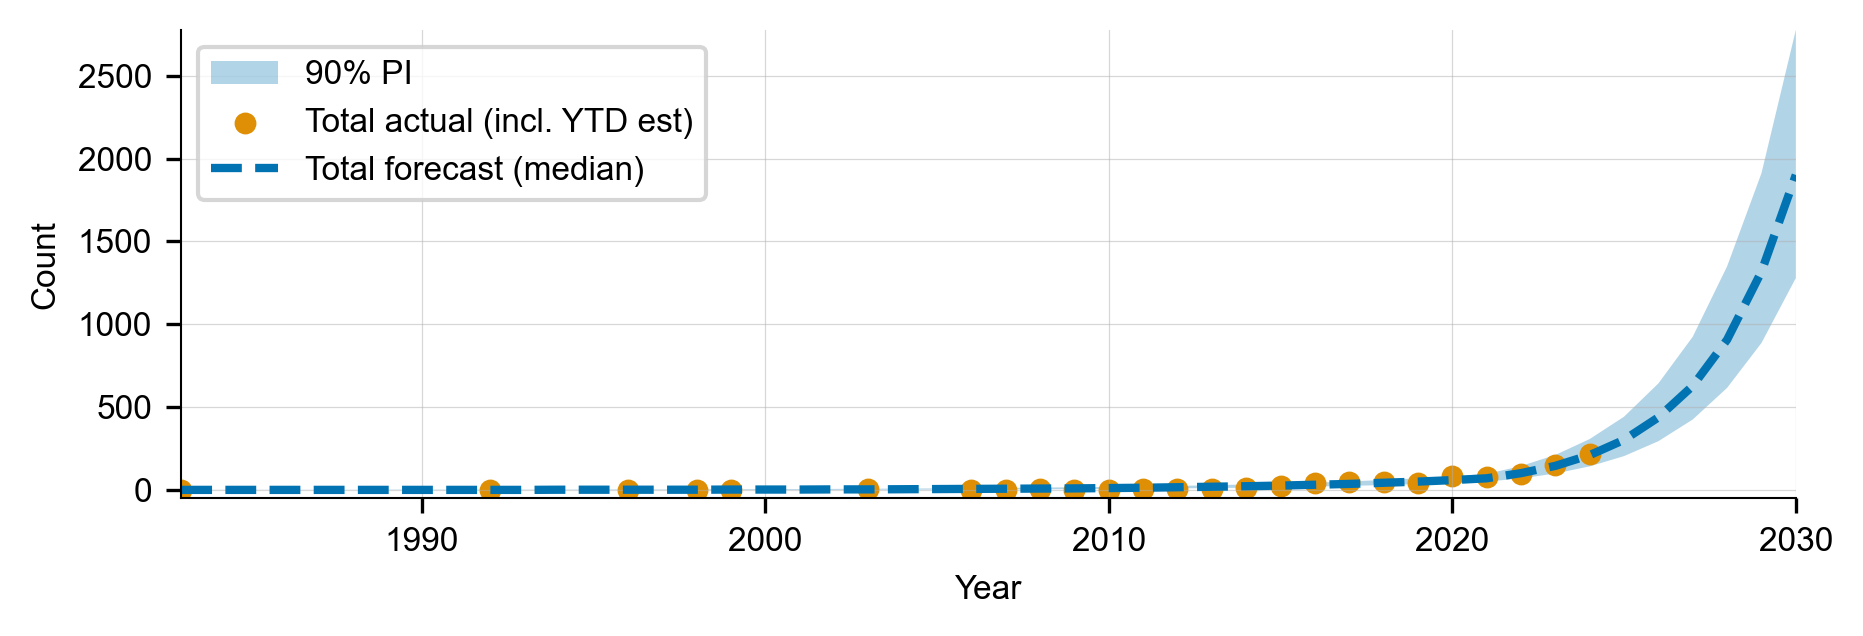

In [3]:
cfg = ForecastConfig(
    MAX_KNOTS_TOTAL=6,
    MAX_KNOTS_SHARES=4,
    ALPHA_TOTAL=0.005,
    TAU_YEARS=5.0,
    W_HIST_MAX=0.4,
    W_UNIF_MAX=0.2,
    MOM_TILT_MAX=0.7,
    MOM_TAU=3,
    RECENT_WIN=7,
    CAT_BOOST_SURGE=7,
    GROWTH_FLOOR_FRAC=0.07,
    SHARE_KAPPA=35,
    # from calibration_analysis.ipynb
    B_SIM=5000,                    # Increased for stability
    CONFIDENCE_LEVEL=0.90,         
    BOOTSTRAP_ITERS=500,           
    MIN_PI_WIDTH=0.2,              
    GROWTH_UNCERTAINTY_FACTOR=1,  # Calibrated value 0.686,
    YTD_YEAR=2025,
    MONOTONE_TOTALS=False,
    NO_DIP_FIRST_YEAR=False,
    NONDECREASING_CATEGORIES=False,
    ASSIMILATE_YTD=False # True for production
)
res_rd = forecast_by_category(
    merged_df, date_col="date", cat_col="Risk Domain", config=cfg
)

plot_total_panel(res=res_rd)